In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\vkdamera\\Downloads\\Batch 98 Day 27\\Batch 98 Day 27\\')

In [3]:
pwd

'C:\\Users\\vkdamera\\Downloads\\Batch 98 Day 27\\Batch 98 Day 27'

In [4]:
df1 = pd.read_csv('Salary_Data.csv')
display (df1)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
x = df1.iloc[:,:-1]
print (x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [6]:
y = df1.iloc[:,1]
print (y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


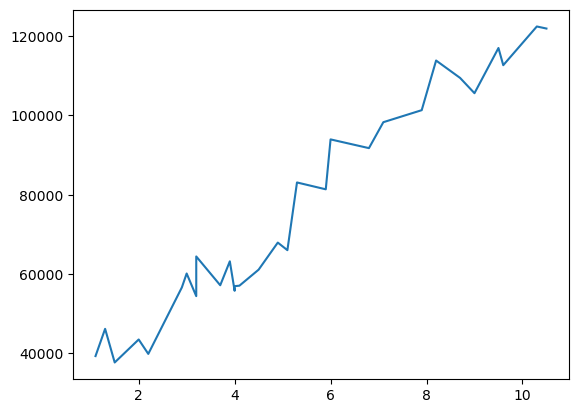

In [7]:
plt.plot (x,y)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print ('X Shape-',x.shape)
print ('Y Shape-', y.shape)
print ('X_Train Shape-',x_train.shape)
print ('Y_Train Shape-',y_train.shape)
print ('X_Test Shape-',x_test.shape)
print ('Y_Test Shape-',y_test.shape)

X Shape- (30, 1)
Y Shape- (30,)
X_Train Shape- (24, 1)
Y_Train Shape- (24,)
X_Test Shape- (6, 1)
Y_Test Shape- (6,)


In [9]:
print (x_test)

    YearsExperience
18              5.9
1               1.3
21              7.1
17              5.3
22              7.9
13              4.1


In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print (lr)

LinearRegression()


In [11]:
x_test

,YearsExperience
18,5.9
1,1.3
21,7.1
17,5.3
22,7.9
13,4.1


In [12]:
y_pred= lr.predict(x_test)
print (y_pred)

[ 80999.97469359  37259.51047818  92410.53057587  75294.69675245
 100017.56783073  63884.14087017]


In [13]:
from sklearn.metrics import r2_score
accuracy =r2_score(y_test,y_pred)
print (accuracy)

0.9085144751959192


In [14]:
print ('Coefficient', lr.coef_)
print ('Intercept', lr.intercept_)

Coefficient [9508.79656857]
Intercept 24898.074939042686


In [15]:
y_pred_final = pd.DataFrame(lr.predict(x),columns= ['Salary Prediction'])
result = pd.concat([df1,y_pred_final], axis =1)
result['Difference'] = df1['Salary']-y_pred_final['Salary Prediction']
print (result)

    YearsExperience  Salary  Salary Prediction    Difference
0               1.1   39343       35357.751164   3985.248836
1               1.3   46205       37259.510478   8945.489522
2               1.5   37731       39161.269792  -1430.269792
3               2.0   43525       43915.668076   -390.668076
4               2.2   39891       45817.427390  -5926.427390
5               2.9   56642       52473.584988   4168.415012
6               3.0   60150       53424.464645   6725.535355
7               3.2   54445       55326.223958   -881.223958
8               3.2   64445       55326.223958   9118.776042
9               3.7   57189       60080.622243  -2891.622243
10              3.9   63218       61982.381556   1235.618444
11              4.0   55794       62933.261213  -7139.261213
12              4.0   56957       62933.261213  -5976.261213
13              4.1   57081       63884.140870  -6803.140870
14              4.5   61111       67687.659498  -6576.659498
15              4.9   67

In [16]:
from sklearn.metrics import r2_score
accuracy = r2_score(df1['Salary'],y_pred_final)
print (accuracy)

0.9564540996132017
